# Using a New Machine Learning Classifier for Algorithmic Trading

## Background

Choosing a machine learning model to use in a trading strategy is a matter of trial and error. In this way, you find a model that produces the desired outcomes with an acceptable level of performance.

In the machine learning section of the boot camp, you learned about some classification models, such as logistic regression, support vector machines (SVM), and neural networks. In this activity, you'll train a logistic regression model to make trading predictions, backtest the results, and then evaluate its performance compared to that of a SVM model.

## Instructions:

1. Open the provided starter code. Inspect and run all the cells up to the “Add a New Machine Learning Model” section to review the data loading and preparation process, as well as the inclusion of a SVM model in a trading algorithm.

2. Import the `LogisticRegression` model from scikit-learn.

    > **Rewind** Recall that `LogisticRegression` models are used for binary classification problems.

3. Using the same training data that the SVM model used (`X_train_scaled` and `y_train`), fit the `LogisticRegression` model.

4. Use the trained model to predict the trading signals for the training data. Use the `classification_report` module to evaluate the model.

5. Backtest the `LogisticRegression` model to evaluate its performance.

6. Compare the performance of the logistic regression and SVM models using the classification reports generated with the testing data.  Did the logistic regression model perform better than SVM? Write down your conclusions to share with the class.


## References

* [SKLearn SVM - SVC Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

* [SKLearn LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

---

In [1]:
# Imports
import pandas as pd
from pathlib import Path

### Read the CSV file into Pandas DataFrame

In [2]:
# Import the OHLCV dataset into a Pandas Dataframe
trading_df = pd.read_csv(
    Path("Bitstamp_BTCUSD_d.csv"), 
    index_col="date", 
    infer_datetime_format=True, 
    parse_dates=True
)

# Review the DataFrame
trading_df.head()

,unix,symbol,open,high,low,close,Volume BTC,Volume USD
date,,,,,,,,
2021-09-30,1632960000,BTC/USD,41537.56,41808.17,41427.87,41756.90,25.075893,1.047092e+06
2021-09-29,1632873600,BTC/USD,41024.21,42595.93,40750.00,41542.90,1804.778085,7.497572e+07
2021-09-28,1632787200,BTC/USD,42154.87,42778.93,40888.00,41049.00,2246.853580,9.223109e+07
2021-09-27,1632700800,BTC/USD,43162.82,44377.70,42130.00,42189.81,1936.649572,8.170688e+07
2021-09-26,1632614400,BTC/USD,42699.10,43956.38,40808.00,43204.73,1659.784662,7.171055e+07


In [3]:
trading_df.drop(["unix","symbol","open","high","low","Volume BTC","Volume USD"],axis=1, inplace = True)

In [4]:
trading_df.index = pd.to_datetime(trading_df.index).date

In [5]:
# Import the OHLCV dataset into a Pandas Dataframe
BTC_sent = pd.read_csv(
    Path("BTC_sent"), 
    index_col="date", 
    infer_datetime_format=True, 
    parse_dates=True
)

# Review the DataFrame

BTC_sent.head(20)




,Unnamed: 0,tweet,name,tweet_compound,tweet_pos,tweet_neu,tweet_neg,tweet_sent
date,,,,,,,,
2016-01-12 07:05:27,0,As Netflix expands its international subscribe...,Investors.com,0.0000,0.083,0.833,0.083,0
2017-12-29 08:12:07,1,Is Gold Getting Ready To Shine Again As Bitcoi...,Investors.com,0.3612,0.172,0.828,0.000,1
2017-12-28 22:34:02,2,"Apple Apologizes, Bitcoin Rebounds: S&amp;P 50...",Investors.com,0.3612,0.238,0.762,0.000,1
2017-12-28 13:43:09,3,Stocks Hold Modest Gains; Netflix Snaps Back; ...,Investors.com,0.3400,0.167,0.833,0.000,1
2017-12-28 10:00:21,4,"Thursday's Top Stories: Apple, Amazon are each...",Investors.com,0.2732,0.080,0.888,0.032,1
2017-12-28 09:45:47,5,"Thursday's Top Stories: Apple, Amazon are each...",Investors.com,0.2732,0.080,0.888,0.032,1
2017-12-28 08:38:04,6,"Stock Futures Mixed As Amazon, Facebook Rise; ...",Investors.com,0.1779,0.145,0.855,0.000,1
2017-12-27 19:12:06,7,"Will Bitcoin, AI Stay Atop The Hottest Market ...",Investors.com,0.0000,0.000,1.000,0.000,0
2017-12-26 09:38:12,8,Tuesday's Top Stories -- Mallinckrodt buys Suc...,Investors.com,0.7096,0.181,0.782,0.037,1


In [6]:
BTC_sent.drop(["Unnamed: 0","tweet","name","tweet_compound","tweet_pos","tweet_neu","tweet_neg"],axis=1, inplace = True)

In [7]:
BTC_sent.head()

,tweet_sent
date,
2016-01-12 07:05:27,0
2017-12-29 08:12:07,1
2017-12-28 22:34:02,1
2017-12-28 13:43:09,1
2017-12-28 10:00:21,1


In [8]:
BTC_sent.index = pd.to_datetime(BTC_sent.index).date

In [9]:
BTC_sent.head()

,tweet_sent
2016-01-12,0
2017-12-29,1
2017-12-28,1
2017-12-28,1
2017-12-28,1


### Add a daily return values column to the DataFrame

In [10]:
# Calculate the daily returns using the closing prices and the pct_change function
trading_df["actual_returns"] = trading_df["close"].pct_change()

# Drop all NaN values from the DataFrame
trading_df = trading_df.dropna()

# Review the DataFrame
display(trading_df.head())
display(trading_df.tail())

,close,actual_returns
2021-09-29,41542.90,-0.005125
2021-09-28,41049.00,-0.011889
2021-09-27,42189.81,0.027791
2021-09-26,43204.73,0.024056
2021-09-25,42722.19,-0.011169


,close,actual_returns
2014-12-02,379.25,0.006849
2014-12-01,378.39,-0.002268
2014-11-30,373.34,-0.013346
2014-11-29,376.72,0.009053
2014-11-28,376.28,-0.001168


In [11]:
def join_dataframes(df1,df2): 
    df1=df1.join(df2)
    return df1

In [12]:
sent_trade_df=join_dataframes(trading_df, BTC_sent)
sent_trade_df.columns

Index(['close', 'actual_returns', 'tweet_sent'], dtype='object')

In [13]:
sent_trade_df.tail()

,close,actual_returns,tweet_sent
2021-09-25,42722.19,-0.011169,NaN
2021-09-26,43204.73,0.024056,NaN
2021-09-27,42189.81,0.027791,NaN
2021-09-28,41049.00,-0.011889,NaN
2021-09-29,41542.90,-0.005125,NaN


In [14]:
sent_trade_df= sent_trade_df.dropna()

In [15]:
sent_trade_df

,close,actual_returns,tweet_sent
2016-01-07,457.79,0.014336,0.0
2016-01-12,446.27,0.031767,0.0
2016-01-17,382.85,-0.005584,0.0
2016-01-18,385.00,0.013478,-1.0
2016-01-18,385.00,0.013478,-1.0
...,...,...,...
2021-09-22,43589.53,-0.029262,-1.0
2021-09-22,43589.53,-0.029262,1.0
2021-09-23,44903.50,0.047960,0.0
2021-09-23,44903.50,0.047960,1.0


---

### Generating the Features and Target Sets

In [16]:
# Define a window size of 4
short_window = 4

# Create a simple moving average (SMA) using the short_window and assign this to a new columns called sma_fast
sent_trade_df["sma_fast"] = sent_trade_df["close"].rolling(window=short_window).mean()

In [17]:
# Define a window size of 100
long_window = 100

# Create a simple moving average (SMA) using the long_window and assign this to a new columns called sma_slow
sent_trade_df["sma_slow"] = sent_trade_df["close"].rolling(window=long_window).mean()

In [18]:
# Drop the NaNs using dropna()
sent_trade_df = sent_trade_df.dropna()

In [19]:
sent_trade_df

,close,actual_returns,tweet_sent,sma_fast,sma_slow
2016-11-28,730.98,-0.000014,0.0,735.4125,579.8865
2016-12-02,769.99,0.009439,-1.0,746.1375,583.0085
2016-12-02,769.99,0.009439,0.0,754.3925,586.2457
2016-12-02,769.99,0.009439,0.0,760.2375,590.1171
2016-12-07,766.85,-0.001445,0.0,769.2050,593.9356
...,...,...,...,...,...
2021-09-22,43589.53,-0.029262,-1.0,43589.5300,45124.1387
2021-09-22,43589.53,-0.029262,1.0,43589.5300,45091.3658
2021-09-23,44903.50,0.047960,0.0,43918.0225,45071.7326
2021-09-23,44903.50,0.047960,1.0,44246.5150,45052.0994


#### Create the features set

In [20]:
# Assign a copy of the sma_fast and sma_slow columns to a new DataFrame called X
X = sent_trade_df[["sma_fast", "sma_slow","tweet_sent"]].copy()

# Display sample data
display(X.head())
display(X.tail())

,sma_fast,sma_slow,tweet_sent
2016-11-28,735.4125,579.8865,0.0
2016-12-02,746.1375,583.0085,-1.0
2016-12-02,754.3925,586.2457,0.0
2016-12-02,760.2375,590.1171,0.0
2016-12-07,769.2050,593.9356,0.0


,sma_fast,sma_slow,tweet_sent
2021-09-22,43589.5300,45124.1387,-1.0
2021-09-22,43589.5300,45091.3658,1.0
2021-09-23,43918.0225,45071.7326,0.0
2021-09-23,44246.5150,45052.0994,1.0
2021-09-23,44575.0075,45032.4662,1.0


#### Create the target set

In [21]:
# Create a new column in the trading_df called signal setting its value to zero.
sent_trade_df["signal"] = 0.0

<ipython-input-21-f0a1f4d5fe4d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_trade_df["signal"] = 0.0


In [22]:
# Create the signal to buy
sent_trade_df.loc[(sent_trade_df["actual_returns"] >= 0), "signal"] = 1

C:\Users\RUTAT\anaconda3\envs\pyvizenv\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [23]:
# Create the signal to sell
sent_trade_df.loc[(sent_trade_df["actual_returns"] < 0), "signal"] = -1

C:\Users\RUTAT\anaconda3\envs\pyvizenv\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [24]:
# Copy the new signal column to a new Series called y.
y = sent_trade_df["signal"].copy()

In [49]:
sent_trade_df

,close,actual_returns,tweet_sent,sma_fast,sma_slow,signal
2016-11-28,730.98,-0.000014,0.0,735.4125,579.8865,-1.0
2016-12-02,769.99,0.009439,-1.0,746.1375,583.0085,1.0
2016-12-02,769.99,0.009439,0.0,754.3925,586.2457,1.0
2016-12-02,769.99,0.009439,0.0,760.2375,590.1171,1.0
2016-12-07,766.85,-0.001445,0.0,769.2050,593.9356,-1.0
...,...,...,...,...,...,...
2021-09-22,43589.53,-0.029262,-1.0,43589.5300,45124.1387,-1.0
2021-09-22,43589.53,-0.029262,1.0,43589.5300,45091.3658,-1.0
2021-09-23,44903.50,0.047960,0.0,43918.0225,45071.7326,1.0
2021-09-23,44903.50,0.047960,1.0,44246.5150,45052.0994,1.0


---

### Split the Data Into Training and Testing Datasets

#### Creating the Training Datasets

In [25]:
# Imports 
from pandas.tseries.offsets import DateOffset

In [26]:
# Select the start of the training period
training_begin = X.index.min()

# Display the training begin date
print(training_begin)

2016-11-28


In [27]:
# Select the ending period for the training data with an offset of 3 months
training_end = X.index.min() + DateOffset(months=3)

# Display the training end date
print(training_end)

2017-02-28 00:00:00


In [28]:
# Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

# Display sample data
X_train.head()

,sma_fast,sma_slow,tweet_sent
2016-11-28,735.4125,579.8865,0.0
2016-12-02,746.1375,583.0085,-1.0
2016-12-02,754.3925,586.2457,0.0
2016-12-02,760.2375,590.1171,0.0
2016-12-07,769.2050,593.9356,0.0


#### Creating the Testing Datasets

In [29]:
# Generate the X_test and y_test DataFrames
X_test = X.loc[training_end:]
y_test = y.loc[training_end:]

# Display sample data
X_test.head()

,sma_fast,sma_slow,tweet_sent
2017-03-01,1011.4925,739.9252,1.0
2017-03-02,1083.6450,745.7140,1.0
2017-04-14,1136.4725,750.7516,-1.0
2017-04-14,1206.1675,755.7892,-1.0
2017-04-14,1192.1550,760.7480,-1.0


#### Standardizing the Data

In [30]:
# Imports
from sklearn.preprocessing import StandardScaler

In [31]:
# Create a StandardScaler instance
scaler = StandardScaler()
 
# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)
 
# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

---

### Incorporate the SVM Machine Learning Into the Trading Strategy

In [32]:
# Imports
from sklearn import svm
from sklearn.metrics import classification_report

In [33]:
# Create the classifier model
svm_model = svm.SVC()
 
# Fit the model to the data using X_train_scaled and y_train
svm_model = svm_model.fit(X_train_scaled, y_train)

# Use the trained model to predict the trading signals for the training data
training_signal_predictions = svm_model.predict(X_train_scaled)

# Display the sample predictions
training_signal_predictions[:10]

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.])

In [34]:
# Evaluate the model using a classification report
training_report = classification_report(y_train, training_signal_predictions)
print(training_report)

              precision    recall  f1-score   support

        -1.0       0.78      0.75      0.77        24
         1.0       0.70      0.74      0.72        19

    accuracy                           0.74        43
   macro avg       0.74      0.74      0.74        43
weighted avg       0.75      0.74      0.74        43



---

### Backtesting a Machine Learning Trading Algorithm

In [35]:
# Use the trained model to predict the trading signals for the testing data.
testing_signal_predictions = svm_model.predict(X_test_scaled)

In [36]:
# Evaluate the model's ability to predict the trading signal for the testing data
svm_testing_report = classification_report(y_test, testing_signal_predictions)
print(svm_testing_report)

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00       557
         1.0       0.47      1.00      0.64       495

    accuracy                           0.47      1052
   macro avg       0.24      0.50      0.32      1052
weighted avg       0.22      0.47      0.30      1052



C:\Users\RUTAT\anaconda3\envs\pyvizenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RUTAT\anaconda3\envs\pyvizenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RUTAT\anaconda3\envs\pyvizenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
# Create a new empty predictions DataFrame using code provided below.
predictions_df = pd.DataFrame(index=X_test.index)
predictions_df["predicted_signal"] = testing_signal_predictions
predictions_df["actual_returns"] = trading_df["actual_returns"]
predictions_df["trading_algorithm_returns"] = predictions_df["actual_returns"] * predictions_df["predicted_signal"]
predictions_df.head()

,predicted_signal,actual_returns,trading_algorithm_returns
2017-03-01,1.0,-0.024817,-0.024817
2017-03-02,1.0,-0.021574,-0.021574
2017-04-14,1.0,-0.002650,-0.002650
2017-04-14,1.0,-0.002650,-0.002650
2017-04-14,1.0,-0.002650,-0.002650


<AxesSubplot:>

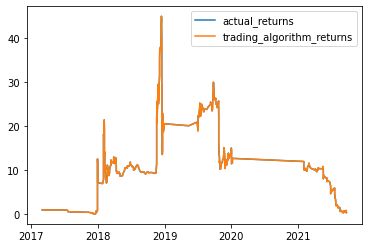

In [39]:
# Calculate and plot the cumulative returns for the `actual_returns` and the `trading_algorithm_returns`
(1 + predictions_df[["actual_returns", "trading_algorithm_returns"]]).cumprod().plot()

---

# Add a New Machine Learning Model

## Import the `LogisticRegression` model from scikit-learn.


In [40]:
# Import LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression

In [41]:
# Create an instance of the LogisticRegression model
logistic_regression_model = LogisticRegression()

## Using the same training data that the SVM model used (`X_train_scaled` and `y_train`), fit the `LogisticRegression` model.

In [42]:
# Fit the LogisticRegression model
logistic_regression_model.fit(X_train_scaled, y_train)

LogisticRegression()

## Use the trained model to predict the trading signals for the training data. Use the `classification_report` module to evaluate the model.

In [43]:
# Use the trained LogisticRegression model to predict the trading signals for the training data
lr_training_signal_predictions = logistic_regression_model.predict(X_train_scaled)

# Display the predictions
lr_training_signal_predictions

array([ 1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,
       -1.,  1., -1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1.,  1.,
        1., -1.,  1.,  1.])

In [44]:
# Generate a classification report using the training data and the logistic regression model's predications
lr_training_report = classification_report(y_train, lr_training_signal_predictions)

# Review the classification report
print(lr_training_report)

              precision    recall  f1-score   support

        -1.0       0.72      0.75      0.73        24
         1.0       0.67      0.63      0.65        19

    accuracy                           0.70        43
   macro avg       0.69      0.69      0.69        43
weighted avg       0.70      0.70      0.70        43



## Backtest the `LogisticRegression` model using the testing data to evaluate its performance.

In [45]:
# Use the trained model to predict the trading signals for the testing data.
lr_testing_signal_predictions = logistic_regression_model.predict(X_test_scaled)

In [46]:
# Generate a classification report using the testing data and the logistic regression model's predictions
lr_testing_report = classification_report(y_test, lr_testing_signal_predictions)

# Review the testing classification report
print(lr_testing_report)

              precision    recall  f1-score   support

        -1.0       0.51      0.76      0.61       557
         1.0       0.38      0.16      0.23       495

    accuracy                           0.48      1052
   macro avg       0.44      0.46      0.42      1052
weighted avg       0.45      0.48      0.43      1052



## Compare the performance of the logistic regression and SVM models using the classification reports generated with the testing data. 

In [47]:
# Print the classification report for the Logistic Regression model using the test data
print("Logistic Regression Classification Report")
print(lr_testing_report)

Logistic Regression Classification Report
              precision    recall  f1-score   support

        -1.0       0.51      0.76      0.61       557
         1.0       0.38      0.16      0.23       495

    accuracy                           0.48      1052
   macro avg       0.44      0.46      0.42      1052
weighted avg       0.45      0.48      0.43      1052



In [48]:
# Print the classification report for the SVM model using the test data
print("SVM Classification Report")
print(svm_testing_report)

SVM Classification Report
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00       557
         1.0       0.47      1.00      0.64       495

    accuracy                           0.47      1052
   macro avg       0.24      0.50      0.32      1052
weighted avg       0.22      0.47      0.30      1052



### Answer the following question:

**Question:** Did the `LogisticRegression` perform better than the `SVM`?

**Answer:** Yes! The logistic regression model performs a bit better than the SVM model since it has a higher accuracy score.